In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1hHuHxIVMc7XaZWAG32q3uDwSkg1Ch_MO' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1hHuHxIVMc7XaZWAG32q3uDwSkg1Ch_MO" -O 'tilled_images.zip' && rm -rf /tmp/cookies.txt

In [7]:
!unzip -q tilled_images.zip

In [6]:
!git clone https://github.com/uhlmanngroup/AURA-Net

fatal: destination path 'AURA-Net' already exists and is not an empty directory.


In [16]:
!cp AURA-Net/util.py  ./

In [1]:
!rm -rf train_imgs/ test_imgs/

In [2]:
!mkdir -p {train_imgs,test_imgs}/{inputs,outputs} 

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

In [4]:
img_size = 256

In [5]:
i=0
for filename in sorted(os.listdir('../tilled_images/images/nolabel')):
    if not filename.startswith('.'):
        if (filename[7:-4]=='1' or filename[7:-4]=='11' or
            filename[7:-4]=='17' or filename[7:-4]=='3' or 
            filename[7:-4]=='23'):
            img_label = cv2.imread(os.path.join('../TNT Masks/TNT Masks '+ filename[7:-3]+'png'),cv2.IMREAD_UNCHANGED)

            img = cv2.imread(os.path.join('../tilled_images/images/nolabel/',filename))

            img_label_output = img_label

            h,w,c = img.shape

            width = img_size
            height = img_size

            corner = 100
            slide_px = 20

            slidew_num = w//slide_px 
            slideh_num = h//slide_px 

            for slw in range(slidew_num):
                for slh in range(slideh_num):

                    if ((slw*slide_px)+width<w):
                        slidew = slw*slide_px
                    else:
                        slidew = w-width

                    if ((slh*height)+height<h):
                        slideh = slh*slide_px
                    else:
                        slideh = h-height

                    imgbox_label     = img_label[slideh:slideh+height,slidew:slidew+width]
                    imgbox_label_mid = img_label[slideh+corner:slideh+height-corner,slidew+corner:slidew+width-corner]
                    imgbox           = img[slideh:slideh+height,slidew:slidew+width]
                    #imgbox       = cv2.resize(imgbox,(img_size,img_size))
                    #imgbox_label       = cv2.resize(imgbox_label,(img_size,img_size))

                    ind_mid = np.where(imgbox_label_mid!=0) # checking if labels are in center

                    if len(ind_mid[0])>50 : 
                        if i<3:
                            cv2.imwrite('./train_imgs/inputs/'+filename[:-4]+'slidew'+str(slidew)+'slideh'+str(slideh)+'.png', imgbox)
                            cv2.imwrite('./train_imgs/outputs/'+filename[:-4]+'slidew'+str(slidew)+'slideh'+str(slideh)+'.png', imgbox_label)
                        elif i<5:
                            cv2.imwrite('./test_imgs/inputs/'+filename[:-4]+'slidew'+str(slidew)+'slideh'+str(slideh)+'.png', imgbox)
                            cv2.imwrite('./test_imgs/outputs/'+filename[:-4]+'slidew'+str(slidew)+'slideh'+str(slideh)+'.png', imgbox_label)
            i=i+1

In [5]:
i=0
for filename in sorted(os.listdir('./tilled_images/images/label')):
  
  img_label = cv2.imread(os.path.join('./tilled_images/images/label',filename))
  
  img = cv2.imread(os.path.join('./tilled_images/images/nolabel/',filename[5:]))

  img_label_output = img_label

  labels = img_label - img
  mask = (labels!=0)
  labels[mask] = 255
  labels[np.logical_not(mask)] = 0

  gray = cv2.cvtColor(labels, cv2.COLOR_BGR2GRAY)
  thresh = 127
  im_bw = cv2.threshold(gray, thresh, 255, cv2.THRESH_BINARY)[1]

  kernel = np.ones((3,3),np.uint8)
  img_label = cv2.dilate(im_bw,kernel,iterations = 2)

  #cv2.imwrite('./labelimg/'+filename[5:-4]+'.png',img_label)

  h,w,c = img.shape

  width = 512
  height = 512

  #corner = 0
  slide_px = 512

  slidew_num = w//slide_px 
  slideh_num = h//slide_px 

  for slw in range(slidew_num):
    for slh in range(slideh_num):

      if ((slw+1)<slidew_num):
        slidew = slw*slide_px
      else:
        slidew = w-width

      if ((slh+1)<slideh_num):
        slideh = slh*slide_px
      else:
        slideh = h-height

      imgbox_label     = img_label[slideh:slideh+height,slidew:slidew+width]
      #imgbox_label_mid = img_label[slideh+corner:slideh+height-corner,slidew+corner:slidew+width-corner]
      imgbox           = img[slideh:slideh+height,slidew:slidew+width]
      imgbox       = cv2.resize(imgbox,(img_size,img_size))
      imgbox_label       = cv2.resize(imgbox_label,(img_size,img_size))

      #ind_mid = np.where(imgbox_label_mid!=0) # checking if labels are in center
      
      #if len(ind_mid[0])>10 : 
      if i<7:
        cv2.imwrite('./train_imgs/inputs/'+filename[5:-4]+'slidew'+str(slidew)+'slideh'+str(slideh)+'.png', imgbox)
        cv2.imwrite('./train_imgs/outputs/'+filename[5:-4]+'slidew'+str(slidew)+'slideh'+str(slideh)+'.png', imgbox_label)
      elif i<10:
        cv2.imwrite('./test_imgs/inputs/'+filename[5:-4]+'slidew'+str(slidew)+'slideh'+str(slideh)+'.png', imgbox)
        cv2.imwrite('./test_imgs/outputs/'+filename[5:-4]+'slidew'+str(slidew)+'slideh'+str(slideh)+'.png', imgbox_label)
  i=i+1



---



---

---



---



In [6]:
path_to_img = './train_imgs/inputs'
path_to_mask  = './train_imgs/outputs'

path_to_test_img = './test_imgs/inputs'
path_to_test_mask  = './test_imgs/outputs'

In [7]:
import os
import random
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from scipy.ndimage.interpolation import map_coordinates
from scipy.ndimage.filters import gaussian_filter
from torchvision.datasets import ImageFolder
from torchvision import transforms
import torch.nn as nn
import torch
from torch.optim import Adam, SGD
from torch.autograd import Variable
from torch.optim import lr_scheduler
import torch.optim as optim
from torch.utils.data import DataLoader
from matplotlib.backends.backend_agg import FigureCanvasAgg
from torch.utils.data import Dataset
from torchvision.transforms import Compose
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision import transforms
from torchvision import models
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision import models
from torch.autograd import Variable as V
import torch.optim as optim
from torch.optim import lr_scheduler
import glob
from collections import OrderedDict
from sklearn.preprocessing import MinMaxScaler

import PIL.Image as Image

from PIL import Image

%matplotlib inline

In [8]:
!pip install numpy libtiff

In [9]:
!pip install albumentations

In [10]:
from libtiff import TIFF
from util import tif_to_nparray,create_dir,to_numpy,resize_my_images,load_image,load_set,save_to_tif

###Dataloading

In [11]:
from albumentations import (
    Resize,
    PadIfNeeded,
    HorizontalFlip,
    VerticalFlip,    
    CenterCrop,    
    Crop,
    Compose,
    Transpose,
    RandomRotate90,
    ElasticTransform,
    GridDistortion, 
    OpticalDistortion,
    RandomSizedCrop,
    OneOf,
    CLAHE,
    RandomBrightnessContrast,    
    RandomGamma    
)

In [12]:
original_height=img_size#put the size of you're image
original_width=img_size#put the size of you're image
#You can modify this code by adding/removing transformations
transform_train=Compose([
    VerticalFlip(p=0.5),              
    RandomRotate90(p=0.5),
    OneOf([
        ElasticTransform(p=0.8, alpha=120, sigma=120 * 0.05, alpha_affine=120 * 0.03),
        GridDistortion(p=0.2),
        OpticalDistortion(p=0.4, distort_limit=2, shift_limit=0.5)                  
        ], p=0.8)
         ])
transform_val=Compose([
   Resize(img_size,img_size)])#depends of your image sizes
transform_nolastic=Compose([
    VerticalFlip(p=0.5),              
    RandomRotate90(p=0.5)])

In [13]:
class Embryo_elastic(Dataset):
    def __init__(self,img_fol,mask_fol,transform=None):
        self.img_fol=img_fol
        self.mask_fol=mask_fol
        self.transform=transform
    def __getitem__(self, idx):
        image=load_set(self.img_fol,is_mask=False)[0][idx]
        mask=load_set(self.mask_fol,is_mask=True)[0][idx]
        if self.transform:
            augmented = self.transform(image=image, mask=mask)
            image=augmented['image']
            mask=augmented['mask']
            #change the normalize img by the normalization you want to do. 
            #Note that aura net is based on pretrained resnet so it should be transforms.
            #Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)) 
            #and that applies for images in the datalodaders. (not the mask) 
            normalize_img= transforms.Compose([transforms.ToTensor()])
            image=normalize_img(image)
            image=image.permute(0,2,1) 
            transform_to_tensor = transforms.Compose([transforms.ToTensor()])
            mask=transform_to_tensor(mask)


        else:
            #same here
            normalize_img= transforms.Compose([transforms.ToTensor()])
            image=normalize_img(image)
            image=image.permute(0,2,1) 
            transform_to_tensor = transforms.Compose([transforms.ToTensor()]) 
            mask=transform_to_tensor(mask)                        
        
        return image, mask
 

    def __len__(self):
        return len(load_set(self.mask_fol,is_mask=True)[1])

In [14]:
def get_emb_elastic_loader(path_img,path_mask, validation_split=.20,  shuffle_dataset=True):
    dataset = Embryo_elastic(path_img,path_mask)  # instantiating the data set.
    dataset_size = len(dataset)
    indices = list(range(dataset_size))

    split_val = int(np.floor(validation_split * dataset_size))

    if shuffle_dataset:
        np.random.shuffle(indices)

    train_indices = indices[split_val :]
    val_indices = indices[: split_val]
    
    train_sampler = SubsetRandomSampler(train_indices)
    valid_sampler = SubsetRandomSampler(val_indices)
    
    
    dataset_train=Embryo_elastic(path_img,path_mask,transform=transform_train)
    dataset_val=Embryo_elastic(path_img,path_mask,transform=transform_val)
    loader = {
        'train': DataLoader(dataset_train, batch_size=4, sampler=train_sampler),
        'val': DataLoader(dataset_val, batch_size=1, sampler=valid_sampler),
    }
    return loader

In [15]:
dataloader=get_emb_elastic_loader(path_to_img,path_to_mask)

In [16]:
#Dataloader for testing
class Embryo_elastic_for_test(Dataset):
    def __init__(self,img_fol,mask_fol):
        self.img_fol=img_fol
        self.mask_fol=mask_fol
    def __getitem__(self, idx):
        image=load_set(self.img_fol,is_mask=False)[0][idx]
        mask=load_set(self.mask_fol,is_mask=True)[0][idx]
        #add normalization if you want
        normalize_img= transforms.Compose([transforms.ToTensor()])
        image=normalize_img(image)
        image=image.permute(0,2,1) 
        transform_to_tensor = transforms.Compose([transforms.ToTensor()]) 
        mask=transform_to_tensor(mask) 
                               
        return image,mask
 

    def __len__(self):
        return len(load_set(self.img_fol,is_mask=False)[1])



def get_dataset_test(path_img_test,path_mask_test):
  dataset_test=Embryo_elastic_for_test(path_img_test,path_mask_test)
  loader={
      'test':DataLoader(dataset_test,batch_size=1)
  }
  return loader

In [17]:
dataloader_test=get_dataset_test(path_to_test_img,path_to_test_mask)

###Training

In [18]:
from collections import defaultdict
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [19]:
def calc_loss(pred, target, metrics, bce_weight=0.5):#you can use the weights you want for the bce_weights
    bce = torch.nn.functional.binary_cross_entropy_with_logits(pred, target)
    
    pred = torch.sigmoid(pred)
    dice = dice_loss(pred, target)

    AC=active_contour_loss(target,pred)

    loss_bce_dice = bce * bce_weight + dice * (1 - bce_weight)
    
    loss=0.4*loss_bce_dice + 0.6*AC#put whatever weights you want

    metrics['bce'] += bce.data.cpu().numpy() * target.size(0)
    metrics['dice'] += dice.data.cpu().numpy() * target.size(0)
    metrics['AC'] += AC*target.size(0)
    metrics['loss_bce_dice'] += loss_bce_dice.data.cpu().numpy() * target.size(0)
    metrics['loss'] += loss.data.cpu().numpy() * target.size(0)

    return loss

def active_contour_loss(y_true, y_pred):
  '''
  y_true, y_pred: tensor of shape (B, C, H, W), where y_true[:,:,region_in_contour] == 1, y_true[:,:,region_out_contour] == 0.
  weight: scalar, length term weight.
  '''
  # length term
  delta_r = y_pred[:,:,1:,:] - y_pred[:,:,:-1,:] # horizontal gradient (B, C, H-1, W) 
  delta_c = y_pred[:,:,:,1:] - y_pred[:,:,:,:-1] # vertical gradient   (B, C, H,   W-1)
  
  delta_r    = delta_r[:,:,1:,:-2]**2  # (B, C, H-2, W-2)
  delta_c    = delta_c[:,:,:-2,1:]**2  # (B, C, H-2, W-2)
  delta_pred = torch.abs(delta_r + delta_c) 

  epsilon = 1e-8 # where is a parameter to avoid square root is zero in practice.
  lenth = torch.mean(torch.sqrt(delta_pred + epsilon)) # eq.(11) in the paper, mean is used instead of sum.
  
  # region term
  C_in  = torch.ones_like(y_pred)
  C_out = torch.zeros_like(y_pred)

  region_in  = torch.mean( y_pred     * (y_true - C_in )**2 ) # equ.(12) in the paper, mean is used instead of sum.
  region_out = torch.mean( (1-y_pred) * (y_true - C_out)**2 ) 
  region = region_in + region_out
  
  loss =  0.2*lenth + 0.8*region

  return loss




def compute_metrics(metrics, epoch_samples):
    computed_metrics = {}
    for k in metrics.keys():
        computed_metrics[k] = metrics[k] / epoch_samples
    return computed_metrics


def print_metrics(computed_metrics, phase):
    outputs = []
    for k in computed_metrics.keys():
        outputs.append("{}:{:4f}".format(k, computed_metrics[k]))

    print("\t{}-> {}".format(phase.ljust(5), "|".join(outputs)))


def dice_loss(pred, target, smooth=1.):
    pred = pred.contiguous()
    target = target.contiguous()

    intersection = (pred * target).sum(dim=2).sum(dim=2)

    loss = (1 - ((2. * intersection + smooth) /
                 (pred.sum(dim=2).sum(dim=2) + target.sum(dim=2).sum(dim=2) + smooth)))

    return loss.mean()



def normalise_mask_set(mask, threshold):
  
  mask[mask > threshold] = 1
  mask[mask <= threshold] = 0
  return mask 


def normalise_mask(mask, threshold=0.5):
  
  mask[mask > threshold] = 1
  mask[mask <= threshold] = 0
  return mask    


def metrics_line(data):
    phases = list(data.keys())
    metrics = list(data[phases[0]][0].keys())

    i = 0
    fig, axs = plt.subplots(1, len(metrics))
    fig.set_figheight(6)
    fig.set_figwidth(6 * len(metrics))
    for metric in metrics:
        for phase in phases:
            axs[i].plot([i[metric] for i in data[phase]], label=phase)
        axs[i].set_title(metric)
        i += 1

    plt.legend()
    plt.show()

In [20]:
from collections import defaultdict
import copy
import time

import torch


class Trainers(object):

    def __init__(self, model, optimizer=None, scheduler=None):

        super().__init__()

        self.device = torch.device(
            'cuda' if torch.cuda.is_available() else 'cpu')

        self.model = model.to(self.device)

        self.optimizer = optimizer
        if self.optimizer == None:
            self.optimizer = torch.optim.Adam(self.model.parameters(), lr=1e-4)

        self.scheduler = scheduler
        if self.scheduler == None:
            self.scheduler = torch.optim.lr_scheduler.StepLR(
                self.optimizer, step_size=5, gamma=0.1)

    def train_model(self, dataloaders, num_epochs=25):
        best_model_wts = copy.deepcopy(self.model.state_dict())
        best_loss = 1e10
        epochs_metrics = {
            'train': [],
            'val': []
        }

        for epoch in range(num_epochs):
            print('Epoch {}/{}:'.format(epoch+1, num_epochs))

            since = time.time()


            # Each epoch has a training and validation phase
            for phase in ['train', 'val']:
                if phase == 'train':
                    for param_group in self.optimizer.param_groups:
                        print("\tlearning rate: {:.2e}".format(
                            param_group['lr']))

                    self.model.train()  # Set model to training mode
                else:
                    self.model.eval()   # Set model to evaluate mode

                metrics = defaultdict(float)
                epoch_samples = 0

                for inputs, labels in dataloaders[phase]:
                    
                    inputs = inputs.to(self.device)
                    labels = labels.to(self.device)
                    inputs=inputs.permute(0,1,3,2)#put the mask and inputs in the same settings
                    

                    # zero the parameter gradients
                    self.optimizer.zero_grad()

                    # forward
                    # track history if only in train
                    with torch.set_grad_enabled(phase == 'train'):
                        
                        outputs = self.model(inputs)
                        
                        loss = calc_loss(outputs, labels,metrics)
                        
                        # backward + optimize only if in training phase
                        if phase == 'train':
                            loss.backward()
                            self.optimizer.step()
                            

                    # statistics
                    epoch_samples += inputs.size(0)

                computed_metrics = compute_metrics(metrics, epoch_samples)
                print_metrics(computed_metrics, phase)
                epochs_metrics[phase].append(computed_metrics)
                epoch_loss = metrics['loss'] / epoch_samples

                if phase == 'train':
                    self.scheduler.step()

                # deep copy the model
                if phase == 'val' and epoch_loss < best_loss:
                    print("\tSaving best model, epoch loss {:4f} < best loss {:4f}".format(
                        epoch_loss, best_loss))
                    best_loss = epoch_loss
                    best_model_wts = copy.deepcopy(self.model.state_dict())
                    if (best_loss<0.40):
                        torch.save(model.state_dict(), 'modelaura_256only.pth') #to save best model
                        print('saved: ',best_loss)
            time_elapsed = time.time() - since
            print('\t{:.0f}m {:.0f}s'.format(
                time_elapsed // 60, time_elapsed % 60))
            print('-' * 10)
            
        print('Best val loss: {:4f}'.format(best_loss))
        
        
        # load best model weights
        self.model.load_state_dict(best_model_wts)

        metrics_line(epochs_metrics)
   
    
    
    def predict(self, X):
        
        self.model.eval()
        X=X.permute(0,1,3,2)
        inputs = X.to(self.device)
        pred = self.model(inputs)
        
        avant_norm = pred.data.cpu().numpy()
        
       
        

        return avant_norm

###AURA-net

In [21]:
from __future__ import print_function, division
import torch.nn as nn
import torch.utils.data
import torch
from torchvision import models

def convrelu(in_channels, out_channels, kernel, padding):
    return nn.Sequential(
        nn.Conv2d(in_channels, out_channels, kernel, padding=padding),
        nn.ReLU(inplace=True),
    )

class conv_block(nn.Module):
    """
    Convolution Block 
    """
    def __init__(self, in_ch, out_ch):
        super(conv_block, self).__init__()
        
        self.conv = nn.Sequential(
            nn.Conv2d(in_ch, out_ch, kernel_size=3, stride=1, padding=1, bias=True),
            nn.BatchNorm2d(out_ch),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_ch, out_ch, kernel_size=3, stride=1, padding=1, bias=True),
            nn.BatchNorm2d(out_ch),
            nn.ReLU(inplace=True))

    def forward(self, x):

        x = self.conv(x)
        return x


class up_conv(nn.Module):
    """
    Up Convolution Block
    """
    def __init__(self, in_ch, out_ch):
        super(up_conv, self).__init__()
        self.up = nn.Sequential(
            nn.Upsample(scale_factor=2),
            nn.Conv2d(in_ch, out_ch, kernel_size=3, stride=1, padding=1, bias=True),
            nn.BatchNorm2d(out_ch),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        x = self.up(x)
        return x



class Attention_block(nn.Module):
    """
    Attention Block
    """

    def __init__(self, F_g, F_l, F_int):
        super(Attention_block, self).__init__()

        self.W_g = nn.Sequential(
            nn.Conv2d(F_l, F_int, kernel_size=1, stride=1, padding=0, bias=True),
            nn.BatchNorm2d(F_int)
        )

        self.W_x = nn.Sequential(
            nn.Conv2d(F_g, F_int, kernel_size=1, stride=1, padding=0, bias=True),
            nn.BatchNorm2d(F_int)
        )

        self.psi = nn.Sequential(
            nn.Conv2d(F_int, 1, kernel_size=1, stride=1, padding=0, bias=True),
            nn.BatchNorm2d(1),
            nn.Sigmoid()
        )

        self.relu = nn.ReLU(inplace=True)

    def forward(self, g, x):
        g1 = self.W_g(g)
        x1 = self.W_x(x)
        psi = self.relu(g1 + x1)
        psi = self.psi(psi)
        out = x * psi
        return out


def convrelu(in_channels, out_channels, kernel, padding):
    return nn.Sequential(
        nn.Conv2d(in_channels, out_channels, kernel, padding=padding),
        nn.ReLU(inplace=True),
    )


class AURA_net(nn.Module):
    
    def __init__(self, img_ch=3, output_ch=1):
        super(AURA_net, self).__init__()

        n1 = 64
        filters = [n1, n1 * 2, n1 * 4, n1 * 8, n1 * 16]

        self.base_model = models.resnet18(pretrained=True)
        

        self.base_layers = list(self.base_model.children())
        
        # size=(N, 64, x.H/2, x.W/2)
        

        self.layer0 = nn.Sequential(*self.base_layers[:3])
     
        self.layer1 = nn.Sequential(*self.base_layers[3:5])
       
        self.layer2 = self.base_layers[5]  # size=(N, 128, x.H/8, x.W/8)
       
        self.layer3 = self.base_layers[6]  # size=(N, 256, x.H/16, x.W/16)
        
        self.layer4 = self.base_layers[7]  # size=(N, 512, x.H/32, x.W/32)

        
      
        self.fix=nn.Upsample(scale_factor=4)
        
        
        self.Maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.Maxpool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.Maxpool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.Maxpool4 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.Conv1 = conv_block(img_ch, filters[0])
        self.Conv2 = conv_block(filters[0], filters[1])
        self.Conv3 = conv_block(filters[1], filters[2])
        self.Conv4 = conv_block(filters[2], filters[3])
        self.Conv5 = conv_block(filters[3], filters[4])

        self.Up5 = up_conv(filters[4], filters[3])
        self.Att5 = Attention_block(F_g=filters[3], F_l=filters[3], F_int=filters[2])
        self.Up_conv5 = conv_block(filters[4], filters[3])

        self.Up4 = up_conv(filters[3], filters[2])
        self.Att4 = Attention_block(F_g=filters[2], F_l=filters[2], F_int=filters[1])
        self.Up_conv4 = conv_block(filters[3], filters[2])

        self.Up3 = up_conv(filters[2], filters[1])
        self.Att3 = Attention_block(F_g=filters[1], F_l=filters[1], F_int=filters[0])
        self.Up_conv3 = conv_block(filters[2], filters[1])

        self.Up2 = up_conv(filters[1], filters[0])
        self.Att2 = Attention_block(F_g=filters[0], F_l=filters[0], F_int=32)
        self.Up_conv2 = conv_block(filters[1], filters[0])

        self.Up1 = up_conv(filters[0], filters[0])
        self.Att1 = Attention_block(F_g=filters[0], F_l=filters[0],  F_int=32)
        self.Up_conv1 = conv_block(filters[1], filters[0])

        self.Up0 = up_conv(filters[0], filters[0])
        self.Att0 = Attention_block(F_g=filters[0], F_l=filters[0],  F_int=32)
        self.Up_conv0 = conv_block(filters[0], filters[0])

        self.conv_original_size0 = convrelu(3, 64, 3, 1)
        self.conv_original_size1 = convrelu(64, 64, 3, 1)
        self.conv_original_size2 = convrelu(128, 64, 3, 1)

        self.Conv = nn.Conv2d(filters[0], output_ch, kernel_size=1, stride=1, padding=0)
        
        #self.active = torch.nn.Sigmoid()
        

    def forward(self, x):

        x_original = self.conv_original_size0(x)
        x_original = self.conv_original_size1(x_original)
        
       
        
        e0 = self.layer0(x)
        
        
      
        e1= self.layer1(e0)
        
        
        e2 = self.layer2(e1)
    
        
        
        e3 = self.layer3(e2)
        
        
        
        e4 = self.layer4(e3)
        
       
        e5 = self.Maxpool4(e4)
        e5 = self.Conv5(e5)
        
        
        d5 = self.Up5(e5)
        x4 = self.Att5(g=d5, x=e4)
        d5 = torch.cat((x4, d5), dim=1)
        d5 = self.Up_conv5(d5)
       

        d4 = self.Up4(d5)
        x3 = self.Att4(g=d4, x=e3)
        d4 = torch.cat((x3, d4), dim=1)
        d4 = self.Up_conv4(d4)
        
        
        d3 = self.Up3(d4)
        x2 = self.Att3(g=d3, x=e2)
        d3 = torch.cat((x2, d3), dim=1)
        d3 = self.Up_conv3(d3)
        
        
        d2 = self.Up2(d3)
        x1 = self.Att2(g=d2, x=e1)
        d2 = torch.cat((x1, d2), dim=1)
        d2 = self.Up_conv2(d2)
        

        d1 = self.Up1(d2)
        x0 = self.Att1(g=d1, x=e0)
        d1 = torch.cat((x0, d1), dim=1)
        d1 = self.Up_conv1(d1)
        

        d0 = self.Up0(d1)
        x=torch.cat((x_original,d0), dim=1)
        d0=self.conv_original_size2(x)
        

        out = self.Conv(d0)



      #  out = self.active(out)

        return out


###Training


In [22]:
!curl https://transfer.sh/nzhgK/model256.pth -o model256.pth

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  179M  100  179M    0     0  13.2M      0  0:00:13  0:00:13 --:--:-- 15.2M


In [22]:
learning_rate=3e-4
step_size=40
gamma=0.9
num_epochs=10

In [23]:
model=AURA_net()

In [20]:
filepath = 'modelnewlabel2.pth' 

In [21]:
device = torch.device("cuda")
model.load_state_dict(torch.load(filepath))
model.to(device)

AURA_net(
  (base_model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track

Epoch 1/10:
	learning rate: 3.00e-04


/opt/conda/lib/python3.7/site-packages/torchvision/transforms/functional.py:74: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  img = torch.from_numpy(pic.transpose((2, 0, 1))).contiguous()


	train-> bce:0.135971|dice:0.869274|AC:0.072046|loss_bce_dice:0.502622|loss:0.244277
	val  -> bce:0.064062|dice:0.737962|AC:0.024724|loss_bce_dice:0.401012|loss:0.175239
	Saving best model, epoch loss 0.175239 < best loss 10000000000.000000
saved:  0.17523905794535363
	3m 24s
----------
Epoch 2/10:
	learning rate: 3.00e-04
	train-> bce:0.052442|dice:0.402897|AC:0.015435|loss_bce_dice:0.227670|loss:0.100329
	val  -> bce:0.038198|dice:0.310796|AC:0.011523|loss_bce_dice:0.174497|loss:0.076713
	Saving best model, epoch loss 0.076713 < best loss 0.121906
saved:  0.07671300152183644
	3m 21s
----------
Epoch 5/10:
	learning rate: 3.00e-04
	train-> bce:0.070183|dice:0.374548|AC:0.015211|loss_bce_dice:0.222365|loss:0.098073
	val  -> bce:0.038753|dice:0.316753|AC:0.008672|loss_bce_dice:0.177753|loss:0.076304
	Saving best model, epoch loss 0.076304 < best loss 0.076713
saved:  0.0763042754759746
	3m 22s
----------
Epoch 6/10:
	learning rate: 3.00e-04
	train-> bce:0.053271|dice:0.329541|AC:0.01271

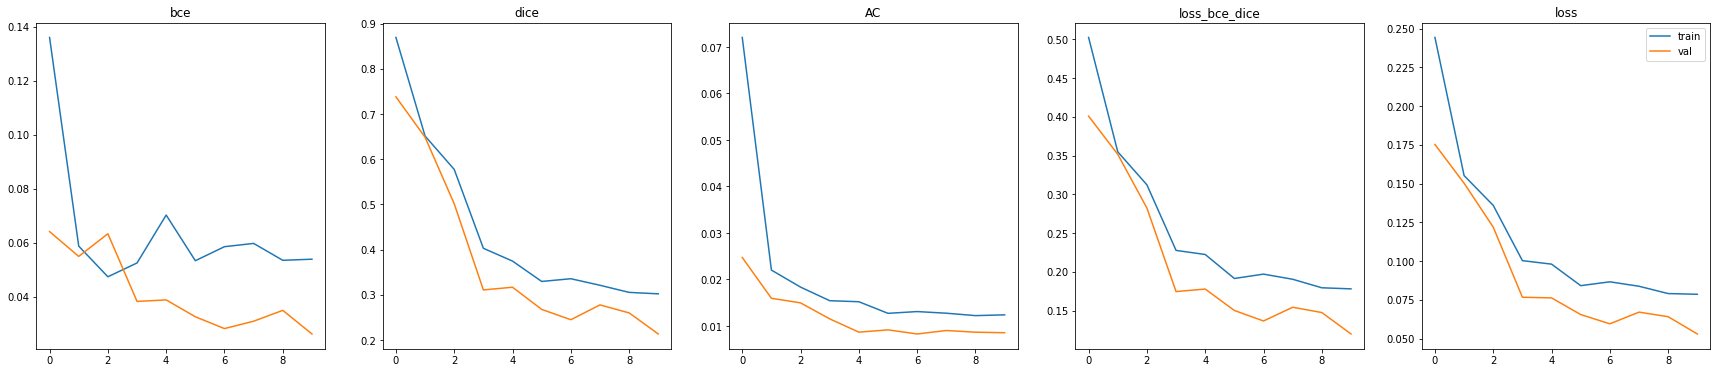

In [24]:
optimizer_func = optim.Adam(model.parameters(), lr=learning_rate)
scheduler = lr_scheduler.StepLR(optimizer_func, step_size=step_size, gamma=gamma)
trainer = Trainers(model, optimizer=optimizer_func, scheduler=scheduler)
trainer.train_model(dataloader, num_epochs=num_epochs)

In [22]:

import matplotlib.pyplot as plt
import numpy as np
import os 
from libtiff import TIFF

def plot_side_by_side(im1,im2):
  f = plt.figure(figsize=(12,12),frameon=False)
  #f = plt.figure()
  f.add_subplot(1,2, 1)
  plt.imshow(np.rot90(im1,2))
  f.add_subplot(1,2, 2)
  plt.imshow(np.rot90(im2,2))
  plt.show(block=True)
  
  
  
def show_me_img(path):#show a single image
  tif=TIFF.open(path)
  image=tif.read_image()
  plt.imshow(image,interpolation='nearest')
  plt.show()


#This function shows evry image in the folder , sorted as image and mask
def show_me_folder(path):
  for file in sorted(os.listdir(path)):
    #if file.endswith(change):#on colab, deleting files will add some weird stuff on the folder
    base_direc=path+'/'
    print(file)
    tif=TIFF.open(base_direc+file)
    image=tif.read_image()
    plt.imshow(image,interpolation='nearest')
    plt.show()

#Visualisation of albumentations transform

def visualize(image, mask, original_image=None, original_mask=None):
    fontsize = 18
    
    if original_image is None and original_mask is None:
        f, ax = plt.subplots(2, 1, figsize=(8, 8))

        ax[0].imshow(image)
        ax[1].imshow(mask)
    else:
        f, ax = plt.subplots(2, 2, figsize=(8, 8))

        ax[0, 0].imshow(original_image)
        ax[0, 0].set_title('Original image', fontsize=fontsize)
        
        ax[1, 0].imshow(original_mask)
        ax[1, 0].set_title('Original mask', fontsize=fontsize)
        
        ax[0, 1].imshow(image)
        ax[0, 1].set_title('Transformed image', fontsize=fontsize)
        
        ax[1, 1].imshow(mask)
        ax[1, 1].set_title('Transformed mask', fontsize=fontsize)


In [2]:
#to plot all images in the validation set, and you can do the same with the test set using dataloader_test['test'].
for epoch, (images, masks) in enumerate(dataloader['val']):
        truth=masks
        img=images
        proba_prediction= trainer.predict(images)
        print('###########################################################')
        print('###########################################################')
        print('###########################################################')
        tmp=proba_prediction.squeeze()
        normalizedImg = np.zeros((img_size, img_size))#put the size of your images here
        normalizedImg = cv2.normalize(tmp,  normalizedImg, 0, 1, cv2.NORM_MINMAX)
        mask_pred=normalise_mask_set(normalizedImg,0.85)
        
        plot_side_by_side(to_numpy(truth.squeeze()),mask_pred.squeeze())
        plot_side_by_side(to_numpy(img.permute(0,3,2,1).squeeze()),proba_prediction.squeeze())
       
        print('###########################################################')
        print('###########################################################')
        print('###########################################################')

NameError: name 'dataloader' is not defined

In [44]:
img = cv2.imread('tilled_images/images/nolabel/Tiling 9.tif')
imglabel = cv2.imread('tilled_images/images/label/YTNT Tiling 9.tif')

h,w,c = img.shape

width = 512
height = 512

slide_px = 512

slidew_num = w//slide_px + 1

wone = (slidew_num-1)*width+(w-(slidew_num-1)*width)
slideh_num = h//slide_px + 1
hone = (slideh_num-1)*height+(h-(slideh_num-1)*height)
imgout = np.ones([1,h,w])
#wone = (slidew_num-1)*width//4+(w-(slidew_num-1)*width)//4
#slideh_num = h//slide_px + 1
#hone = (slideh_num-1)*height//4+(h-(slideh_num-1)*height)//4
#imgout = np.ones([1,h//4,w//4])
temp = np.zeros((img_size, img_size))#put the size of your images here
counter=0
for slw in range(slidew_num):
  for slh in range(slideh_num):

    if ((slw+1)<slidew_num):
      slidew = slw*slide_px
    else:
      slidew = w-width

    if ((slh+1)<slideh_num):
      slideh = slh*slide_px
    else:
      slideh = h-height

    imgbox = img[slideh:slideh+height,slidew:slidew+width]
    #imgbox1 = cv2.resize(imgbox,(img_size,img_size))
      
    imglabelbox = imglabel[slideh:slideh+height,slidew:slidew+width]
    #imglabelbox = cv2.resize(imglabelbox,(img_size,img_size))
      
    normalize_img = transforms.Compose([transforms.ToTensor()])
    image = normalize_img(imgbox).unsqueeze(0)
        
    model.eval()
    
    inputs = image.to(device)
    pred = model(inputs)

    tmp = tmp+pred.data.cpu().numpy().squeeze()
    counter+=1
nVal = np.around(np.log(np.log(-np.sum(tmp/counter)))*0.25,2)    
for slw2 in range(slidew_num):
  for slh2 in range(slideh_num):

    if ((slw2+1)<slidew_num):
      slidew = slw2*slide_px
    else:
      slidew = w-width

    if ((slh2+1)<slideh_num):
      slideh = slh2*slide_px
    else:
      slideh = h-height

    imgbox = img[slideh:slideh+height,slidew:slidew+width]
    #imgbox1 = cv2.resize(imgbox,(img_size,img_size))
      
    imglabelbox = imglabel[slideh:slideh+height,slidew:slidew+width]
    #imglabelbox = cv2.resize(imglabelbox,(img_size,img_size))
      
    normalize_img = transforms.Compose([transforms.ToTensor()])
    image = normalize_img(imgbox).unsqueeze(0)
        
    model.eval()
    
    inputs = image.to(device)
    pred = model(inputs)  
    tmp = pred.data.cpu().numpy().squeeze()
    normalizedImg = np.zeros((img_size, img_size))#put the size of your images here
    normalizedImg = cv2.normalize(tmp,  normalizedImg, 0, 1, cv2.NORM_MINMAX)
    mask_pred=normalise_mask_set(normalizedImg,nVal)
    
    #mask_pred=normalise_mask_set(normalizedImg,0.85)

    #avant_norm = mask_pred.data.cpu().numpy()
    imgout[:,slideh:((slideh+height)),slidew:((slidew+width))]=mask_pred
    #imgout[:,slideh//4:((slideh+height)//4),slidew//4:((slidew+width)//4)]=avant_norm.squeeze()

In [23]:
img = cv2.imread('tilled_images/images/nolabel/Tiling 9.tif')
imglabel = cv2.imread('tilled_images/images/label/YTNT Tiling 9.tif')

h,w,c = img.shape

width = img_size
height = img_size 

slide_px = 256

slidew_num = w//slide_px + 1

wone = (slidew_num-1)*width+(w-(slidew_num-1)*width)
slideh_num = h//slide_px + 1
hone = (slideh_num-1)*height+(h-(slideh_num-1)*height)
imgout = np.ones([1,h,w])
#wone = (slidew_num-1)*width//4+(w-(slidew_num-1)*width)//4
#slideh_num = h//slide_px + 1
#hone = (slideh_num-1)*height//4+(h-(slideh_num-1)*height)//4
#imgout = np.ones([1,h//4,w//4])


for slw in range(slidew_num):
  for slh in range(slideh_num):

    if ((slw+1)<slidew_num):
      slidew = slw*slide_px
    else:
      slidew = w-width

    if ((slh+1)<slideh_num):
      slideh = slh*slide_px
    else:
      slideh = h-height

    imgbox = img[slideh:slideh+height,slidew:slidew+width]
    imgbox = cv2.resize(imgbox,(img_size,img_size))
      
    imglabelbox = imglabel[slideh:slideh+height,slidew:slidew+width]
    imglabelbox = cv2.resize(imglabelbox,(img_size,img_size))
      
    normalize_img = transforms.Compose([transforms.ToTensor()])
    image = normalize_img(imgbox).unsqueeze(0)
        
    model.eval()
    
    inputs = image.to(device)
    pred = model(inputs)

    tmp = pred.data.cpu().numpy().squeeze()
    #tmp[tmp<-11]=-11
    nVal = np.around(np.log(np.log(-np.sum(tmp)))*0.33,2)
    normalizedImg = np.zeros((img_size, img_size))#put the size of your images here
    normalizedImg = cv2.normalize(tmp,  normalizedImg, 0, 1, cv2.NORM_MINMAX)
    mask_pred=normalise_mask_set(normalizedImg,nVal)

    #avant_norm = mask_pred.data.cpu().numpy()
    imgout[:,slideh:((slideh+height)),slidew:((slidew+width))]=mask_pred
    #imgout[:,slideh//4:((slideh+height)//4),slidew//4:((slidew+width)//4)]=tmp



In [25]:
norm_image = cv2.normalize(imgout.squeeze(), None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)

norm_image = norm_image.astype(np.uint8)

thresh = 127
im_bw = cv2.threshold(norm_image, thresh, 255, cv2.THRESH_BINARY)[1]

kernel = np.ones((3,3),np.uint8)
mask = cv2.erode(im_bw,kernel,iterations = 1)

redImg = np.zeros(img.shape, img.dtype)
redImg[:,:] = (0, 0, 255)
redMask = cv2.bitwise_and(redImg, redImg, mask=mask)
cv2.addWeighted(redMask, 1, img, 1, 0, img)
cv2.imwrite('imglabelmatch.png',img)

True

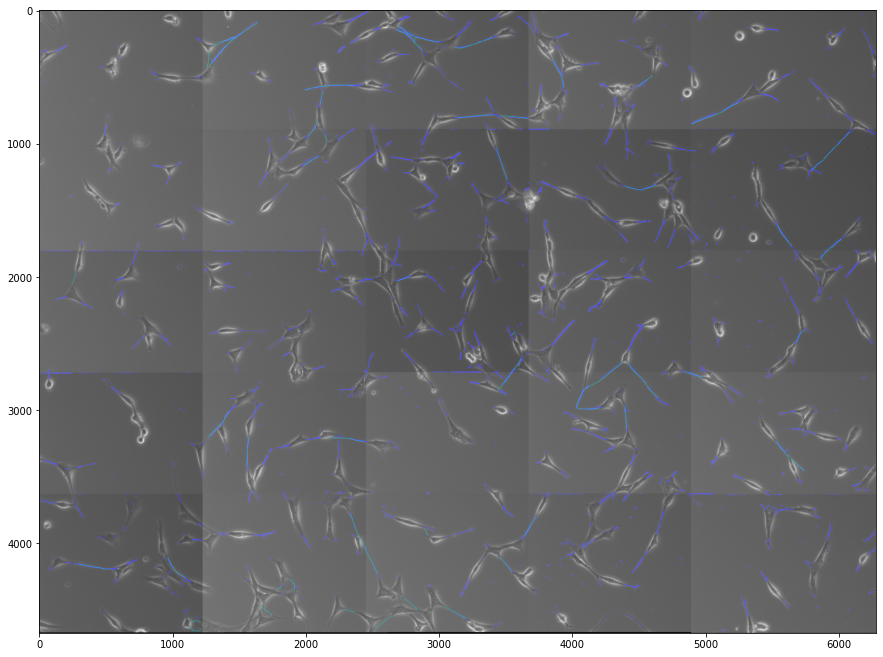

In [25]:
plt.figure(figsize=(15,15),frameon=False)
plt.imshow(imglabel)

In [73]:
cv2.imwrite('img_out.png',norm_image)

True

In [572]:
kernel = np.ones((3,3),np.uint8)
img_out = cv2.erode(im_bw,kernel,iterations = 1)

In [571]:
  #gray = cv2.cvtColor(norm_image, cv2.COLOR_BGR2GRAY)
  thresh = 127
  im_bw = cv2.threshold(norm_image, thresh, 255, cv2.THRESH_BINARY)[1]


In [565]:
imgout

(1, 1174, 1570)

In [72]:
norm_image = cv2.normalize(imgout.squeeze(), None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)

norm_image = norm_image.astype(np.uint8)

In [569]:
norm_image

array([[[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [255,   0,   0, ...,   0,   0,   0]]], dtype=uint8)

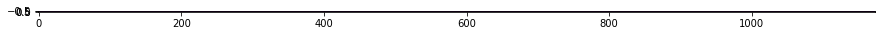

In [574]:
plt.figure(figsize=(15,15),frameon=False)
plt.imshow(img_out)